## Project 2: BMW Pricing

A small project is created to test my foundation of supervised learning. This dataset is taken from a competition in Kaggle as a part of my second personal project. The main reason I have chosen this dataset is because it is my interest in predicting and vizualising the price of the BMW cars. As this is a classification problem, the types of algorthm that has been used are Linear Regression, Decision Tree Regressor, Lasso and Random Forest Regressor. Finally, the objetive of this project is to predict the value of used BMW cars that has been auction in 2018.

### Essential libraries used for this dataset

In [1]:
# import any necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

### Read the data from a csv file 

In [2]:
# read csv file
df = pd.read_csv("BMW_Pricing.csv")

### Provide an insight of the data 

In [3]:
# get an overview of the data 
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [4]:
# overall information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


In [5]:
# decription of the data 
df.dtypes

maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

### Essential data checking such as null values and view the uniqueness of certain columns in the data 

In [6]:
# check for null values 
df.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [7]:
# checking how many unique values in the column 
df['car_type'].unique()

array(['convertible', 'coupe', 'estate', 'hatchback', 'sedan',
       'subcompact', 'suv', 'van'], dtype=object)

In [8]:
# checking how many unique values in the column 
df['fuel'].unique()

array(['diesel', 'petrol', 'hybrid_petrol', 'electro'], dtype=object)

In [9]:
# checking how many unique values in the coLumn 
df['paint_color'].unique()

array(['black', 'grey', 'white', 'red', 'silver', 'blue', 'orange',
       'beige', 'brown', 'green'], dtype=object)

In [10]:
df['registration_date'].unique()

array(['2012-02-01', '2016-04-01', '2012-04-01', '2014-07-01',
       '2014-12-01', '2011-05-01', '2009-05-01', '2009-08-01',
       '2004-07-01', '2013-06-01', '2012-09-01', '2009-09-01',
       '2014-03-01', '2015-08-01', '2009-01-01', '2008-04-01',
       '2015-07-01', '2008-01-01', '2008-03-01', '2013-02-01',
       '2016-01-01', '2014-10-01', '2015-10-01', '2013-05-01',
       '1995-10-01', '2008-08-01', '2010-10-01', '2005-05-01',
       '2014-04-01', '2001-09-01', '2016-03-01', '2008-07-01',
       '1996-08-01', '2012-01-01', '2008-06-01', '2014-05-01',
       '2012-05-01', '2014-01-01', '2016-07-01', '2015-11-01',
       '2002-01-01', '2015-02-01', '2014-09-01', '2015-03-01',
       '2012-06-01', '2013-01-01', '2013-11-01', '2015-09-01',
       '2014-11-01', '2011-03-01', '2012-03-01', '2009-12-01',
       '2009-02-01', '2014-08-01', '2014-02-01', '2008-09-01',
       '2007-07-01', '2001-04-01', '2011-12-01', '2009-07-01',
       '2011-09-01', '2007-01-01', '2016-09-01', '2010-

### Finding, checking and removing outliers using IQR method

Treating outliers can be crucial to provide a better and efficient prediction. It removes any unnecessary data that may alter the performance of the modelling. For this project, I have implemented the IQR method to find, to check and to remove outliers. Firstly, I have created a function to calculate the outliers by formatting it with the IQR formula. Then, I will check for the upper and lower boundaries in every numerical column and remove any outliers. 

In [11]:
# function created to check the values of the outliers
def outlier(data):
    Q1,Q3 = np.percentile(data, [25,75])
    IQR = Q3 - Q1
    upper_boundary = Q3 + (1.5 * IQR)
    lower_boundary = Q1 - (1.5 * IQR)
    return upper_boundary, lower_boundary

In [12]:
# getting the upper and lower boundaries of the column mileage 
upper,lower = outlier(df['mileage'])
upper,lower

(283618.5, -5509.5)

In [13]:
# checking values of the boundary in column mileage 
df[ (df['mileage'] > upper) | (df['mileage'] < lower) ]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
56,BMW,320,329173,110,2004-07-01,diesel,silver,coupe,True,False,False,False,False,False,True,True,2300,2018-08-01
100,BMW,320,342768,135,2011-12-01,diesel,black,coupe,False,True,False,False,True,False,True,False,8200,2018-04-01
179,BMW,320,302525,100,2001-01-01,diesel,grey,estate,False,False,False,False,False,False,True,False,1000,2018-09-01
262,BMW,318,319724,90,2006-09-01,diesel,grey,estate,True,False,False,False,False,False,True,False,3000,2018-01-01
450,BMW,525,316855,150,2010-12-01,diesel,black,estate,True,True,True,False,True,False,True,False,9400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609,BMW,X1,290306,105,2014-03-01,diesel,white,suv,True,True,False,False,True,False,True,True,14000,2018-07-01
4618,BMW,X6,295953,225,2011-10-01,diesel,black,suv,True,True,True,True,True,False,True,True,22000,2018-07-01
4643,BMW,X6,296257,225,2011-10-01,diesel,black,suv,True,True,True,True,True,False,True,True,22000,2018-08-01
4724,BMW,X5,364547,261,2007-06-01,petrol,black,suv,True,True,True,False,True,False,True,True,11300,2018-08-01


In [14]:
# removing outliers from mileage column 
df.drop(df[ (df['mileage'] > upper ) | (df['mileage'] < lower) ].index , inplace=True)
df.head(100)

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,BMW,420,100154,135,2014-03-01,diesel,grey,coupe,True,True,False,False,True,False,True,True,22500,2018-04-01
97,BMW,320,187967,120,2001-04-01,petrol,grey,coupe,True,True,False,False,False,True,True,False,3100,2018-04-01
98,BMW,320,39228,135,2013-01-01,diesel,grey,coupe,False,False,False,False,True,False,True,True,14600,2018-04-01
99,BMW,435,90763,230,2014-05-01,diesel,white,coupe,False,True,True,False,False,True,False,True,26100,2018-04-01


In [15]:
# getting the upper and lower boundaries of the column price 
upper,lower = outlier(df['price'])
upper,lower

(30612.5, -887.5)

In [16]:
# checking values of the boundary in column price
df[ (df['price'] > upper) | (df['price'] < lower) ]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
13,BMW,420,77061,135,2015-08-01,diesel,black,convertible,True,True,False,False,True,True,True,True,36300,2018-03-01
21,BMW,218,24868,100,2016-01-01,petrol,grey,convertible,False,True,False,False,False,False,True,True,31000,2018-05-01
32,BMW,218,25050,100,2016-01-01,petrol,grey,convertible,False,True,False,False,False,False,True,True,31000,2018-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,BMW,X5,122588,190,2015-03-01,diesel,black,suv,True,True,False,True,True,True,True,True,42800,2018-09-01
4791,BMW,X5,158355,160,2014-04-01,diesel,black,suv,True,False,True,False,True,False,True,True,34600,2018-09-01
4793,BMW,X5 M,125197,230,2014-04-01,diesel,blue,suv,True,True,True,True,True,True,True,True,42700,2018-09-01
4795,BMW,X5,87745,230,2014-07-01,diesel,brown,suv,True,True,True,True,False,True,True,True,44700,2018-09-01


In [17]:
# removing outliers from price column 
df.drop(df[ (df['price'] > upper ) | (df['price'] < lower) ].index , inplace=True)
df.head(100)

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
5,BMW,335,152352,225,2011-05-01,petrol,black,convertible,True,True,False,False,True,True,True,True,17100,2018-02-01
6,BMW,325,205219,145,2009-05-01,diesel,grey,convertible,True,True,False,False,True,True,True,True,12400,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,BMW,430 Gran Coupé,162327,190,2014-07-01,diesel,black,coupe,True,True,False,True,True,True,True,True,23300,2018-05-01
119,BMW,420,45299,120,2015-11-01,diesel,brown,coupe,True,True,False,False,True,False,True,True,27600,2018-05-01
120,BMW,335,268780,225,2010-11-01,petrol,white,coupe,True,True,True,False,True,True,True,False,12900,2018-06-01
121,BMW,420,61620,120,2014-01-01,diesel,blue,coupe,False,True,False,True,True,True,True,True,26800,2018-06-01


In [18]:
# getting the upper and lower boundaries of the column engine power
upper,lower = outlier(df['engine_power'])
upper,lower

(187.5, 47.5)

In [19]:
# checking values of the boundary in column price
df[ (df['engine_power'] > upper) | (df['engine_power'] < lower) ]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
5,BMW,335,152352,225,2011-05-01,petrol,black,convertible,True,True,False,False,True,True,True,True,17100,2018-02-01
17,BMW,650,24521,270,2008-01-01,petrol,grey,convertible,True,False,False,False,False,False,True,False,9200,2018-09-01
20,BMW,135,126213,225,2013-02-01,petrol,white,convertible,False,False,False,False,False,True,True,True,16800,2018-05-01
26,BMW,430,113678,190,2014-07-01,diesel,black,convertible,True,True,False,False,True,True,True,True,30100,2018-05-01
37,BMW,650,24452,270,2008-01-01,petrol,grey,convertible,True,False,False,False,False,False,True,False,6800,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,BMW,X6,164866,210,2008-10-01,diesel,grey,suv,True,True,True,True,True,True,True,True,22800,2018-09-01
4776,BMW,X3,144617,230,2012-08-01,diesel,blue,suv,True,True,True,True,True,True,True,True,24500,2018-09-01
4789,BMW,X3,97835,190,2013-06-01,diesel,brown,suv,True,True,True,False,False,False,False,True,5400,2018-09-01
4796,BMW,X5,111962,190,2014-03-01,diesel,black,suv,True,True,False,False,True,False,True,False,26500,2018-09-01


In [20]:
# removing outliers from price column 
df.drop(df[ (df['engine_power'] > upper ) | (df['engine_power'] < lower) ].index , inplace=True)
df.head(100)

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
6,BMW,325,205219,145,2009-05-01,diesel,grey,convertible,True,True,False,False,True,True,True,True,12400,2018-02-01
7,BMW,118,115560,105,2009-08-01,petrol,white,convertible,True,True,False,False,False,True,True,False,6100,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,BMW,330,122991,170,2017-11-01,diesel,green,coupe,True,True,True,False,True,False,True,False,11300,2018-08-01
141,BMW,320,102178,120,2009-09-01,petrol,grey,coupe,True,False,False,False,True,False,True,True,10700,2018-08-01
143,BMW,320,202811,120,2007-11-01,diesel,black,coupe,True,False,False,False,True,False,True,False,7700,2018-08-01
144,BMW,325,169722,145,2008-05-01,diesel,grey,coupe,True,False,False,False,True,False,True,False,8300,2018-08-01


### Data Vizualization: Exploratory Data Analysis (EDA) 

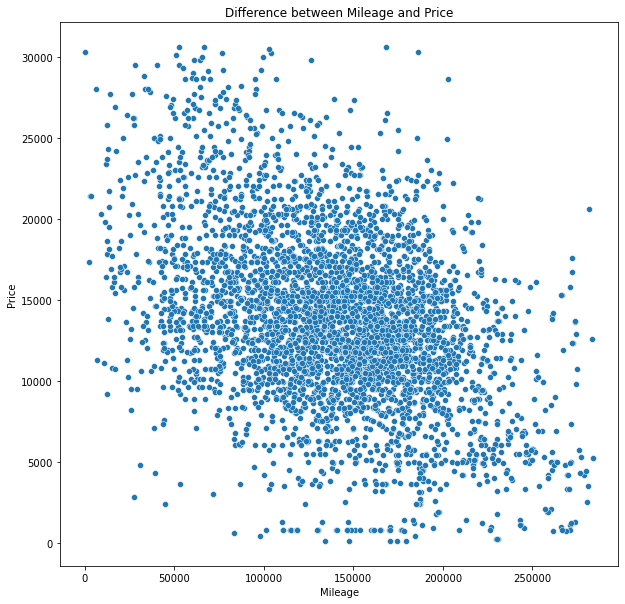

In [21]:
# difference between mileage and price 
plt.figure(figsize=(10,10))
sns.scatterplot(x='mileage', y='price', data = df)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Difference between Mileage and Price", color="black")
plt.show()

A scatter plot is been plotted to differentiate between the price and mileage of the cars. From the above graph, a hypothesis can be made that a vast majority of BMW cars are approximately sold in the range of 10000 and 15000 (median) which could be due to the fact that the mileage of the car is above 100000 and lesser than 200000. However, there are some cars sold at a higher price as it may be that the car is still new as the mileage is low.  

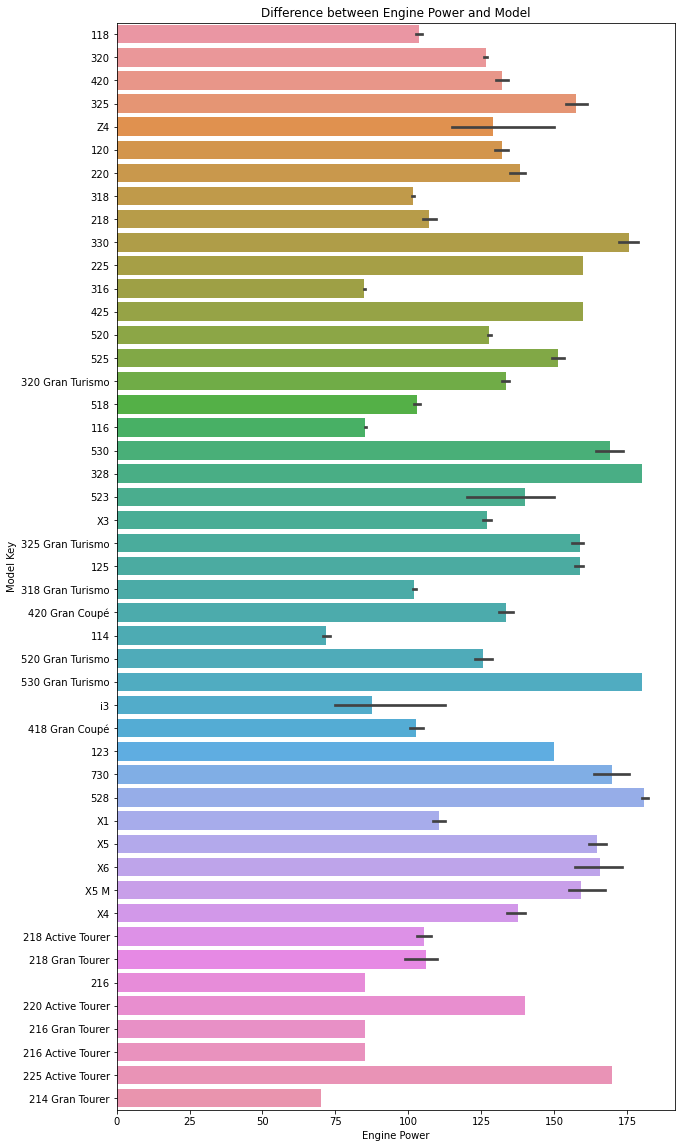

In [22]:
# difference between engine power and model
plt.figure(figsize=(10,20))
sns.barplot(x='engine_power', y='model_key', data = df)
plt.xlabel("Engine Power")
plt.ylabel("Model Key")
plt.title("Difference between Engine Power and Model", color="black")
plt.show()

As many car lovers would admire is definetly the speed of each cars. BMW is well known to produce high quality and dyanmic cars. From the bar graph chartted above, different models of the BMW cars have different engine power. For example, the model key 528, 530 Gran Turismo and 328 generate a whooping 175 horsepower. 

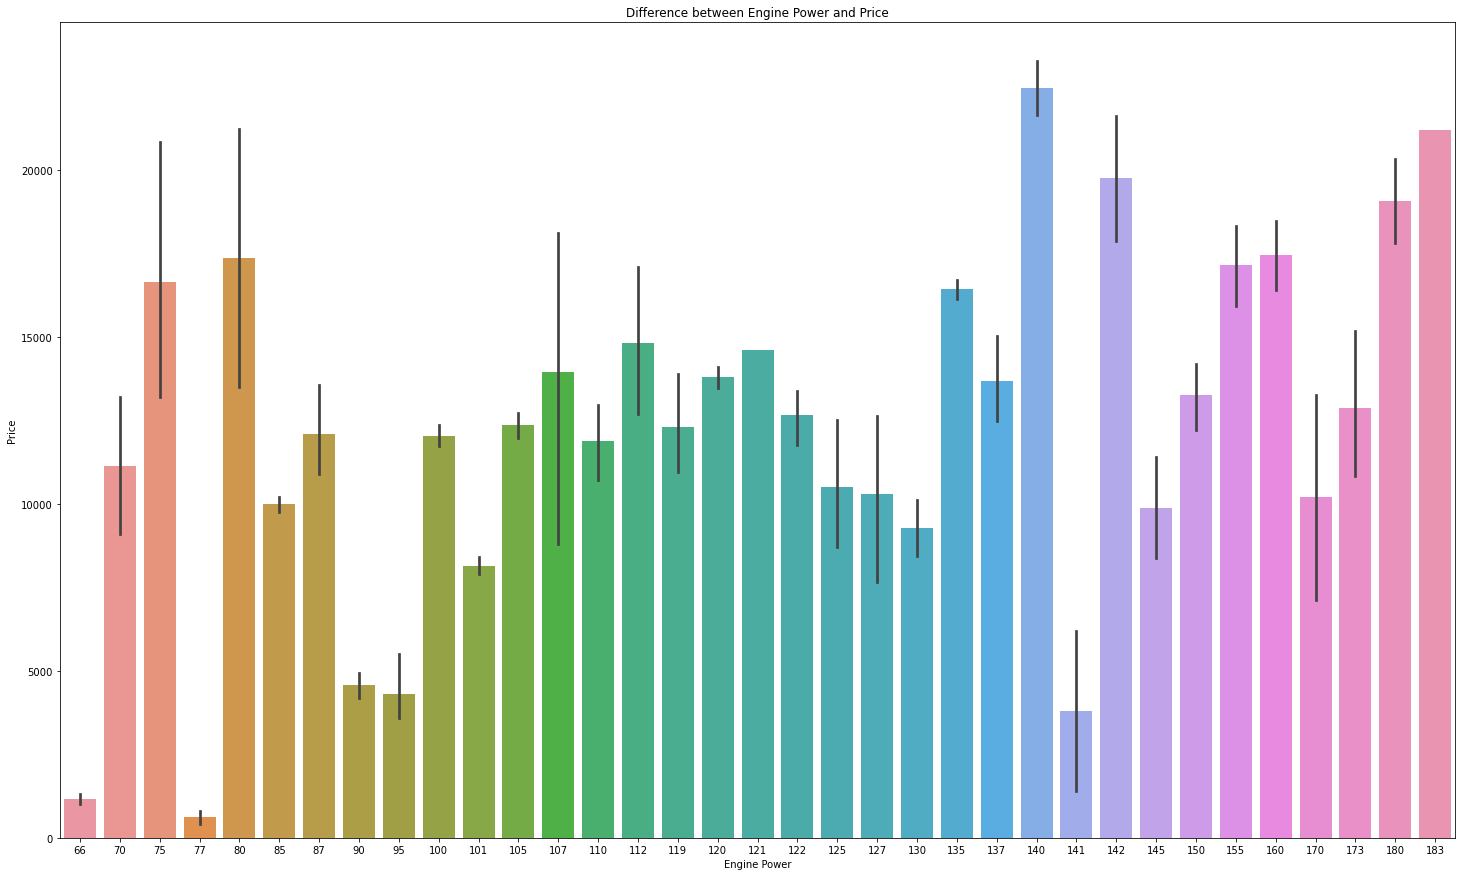

In [23]:
# difference between engine power and price 
plt.figure(figsize=(25,15))
sns.barplot(x='engine_power', y='price', data = df)
plt.xlabel("Engine Power")
plt.ylabel("Price")
plt.title("Difference between Engine Power and Price", color="black")
plt.show()

Furthermore, BMW is prominent with its affordable price but high performance cars. As it can be seen from the bar chart, some cars with the highest engine power (183 horsepower) comes with an affordable price. Although, they are some situation whereby some cars with lower engine power comes with a higher price which could be the reason that the car is new or it has a lower mileage. 

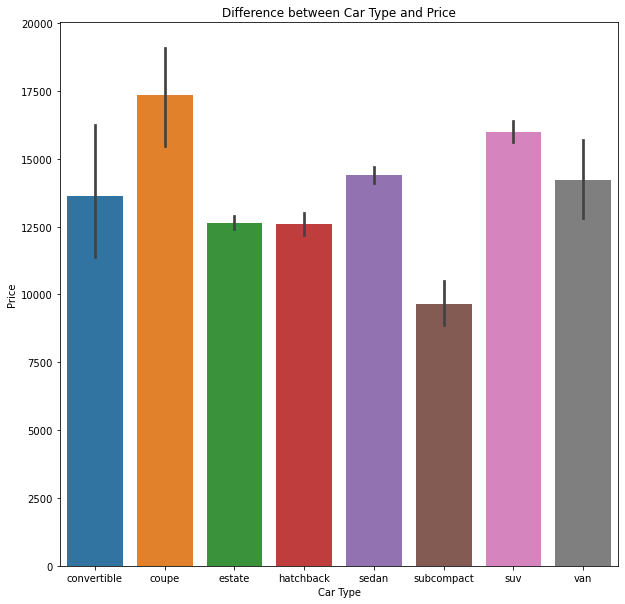

In [24]:
# difference between the car type and price
plt.figure(figsize=(10,10))
sns.barplot(x='car_type', y='price', data = df)
plt.xlabel("Car Type")
plt.ylabel("Price")
plt.title("Difference between Car Type and Price", color="black")
plt.show()

From the plot above, it can be seen that the coupe sells at the highest price which is about 17500. This is because that maybe the coupe car type is more of a sporty and dynamic looking car with a higher engine power compared to the rest of the car type. 

### Libraries used for cleaning and modelling the data 

After treating the outliers and completing the EDA, I have done some data cleaning and then modelling the data by using regression as this is a classification data. Below are some libraries that are helpful for my model.

In [25]:
# important libraries to be imported for prediction 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

### Data Cleaning 

At this stage of data cleaning, LabelEncoder is used to segregrate the ordinal data column by mapping them with numerical values to ensure the right fitting for the model. 

In [55]:
# Data cleaning by using Label Encoder
label_encoder = LabelEncoder()

# encoding for fuel
df['fuel'] = label_encoder.fit_transform(df['fuel'])

# encoding for paint_color
df['paint_color'] = label_encoder.fit_transform(df['paint_color'])

# encoding for car type 
df['car_type'] = label_encoder.fit_transform(df['car_type'])

# encoding for eight different features 
df['feature_1'] = label_encoder.fit_transform(df['feature_1'])
df['feature_2'] = label_encoder.fit_transform(df['feature_2'])
df['feature_3'] = label_encoder.fit_transform(df['feature_3'])
df['feature_4'] = label_encoder.fit_transform(df['feature_4'])
df['feature_5'] = label_encoder.fit_transform(df['feature_5'])
df['feature_6'] = label_encoder.fit_transform(df['feature_6'])
df['feature_7'] = label_encoder.fit_transform(df['feature_7'])
df['feature_8'] = label_encoder.fit_transform(df['feature_8'])

# encoding for registeration data 
df['RD'] = [1 if(i >= "1990-03-01" and i < "2000-01-01") else 2 if(i >= "2000-01-01" and i <= "2010-01-01")
                            else 3 for i in df['registration_date']]

### Data Modelling 

For the data modelling, the data is split into test and training model. The price column of the data is the main purpose of this entire project because it used as target prediction (y) while the rest of the column are used as the inputting feature (X) that assist in predicting the price. The models used for this data are Random Forest Regressor, Lasso, Decision Tree Regressor and Linear Regression with the test size being split to 0.2. 

In [56]:
# Selecting for data modelling (test split) 

# predict target (y)
y = df['price']

# inputting features (x) 
features = ['mileage', 'engine_power', 'fuel', 'paint_color', 'car_type','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8', 'RD']
X = df[features]

In [57]:
# Train model using Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) 
df_model = LinearRegression(fit_intercept=True)
df_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Train model Random Forest Regressor 
df_model_rfg = RandomForestRegressor()
df_model_rfg.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
# Train model Lasso 
df_model_las = Lasso(alpha=1.0)
df_model_las.fit(X_train, y_train)

Lasso()

In [60]:
# Train model Decision Tree Regressor
df_model_dtr = DecisionTreeRegressor()
df_model_dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
# Model prediction using linear regression 
y_pred = df_model.predict(X_test)
y_pred

array([13628.35600316, 14329.03970374, 15689.21035101, 10556.06090883,
       20090.06471136, 14134.9634028 , 12542.53791891, 24297.24398296,
       19234.96856064, 17815.98183842, 17525.67748254, 12036.60743922,
       16506.81230257, 11891.33372031, 17455.49185089, 13592.31717647,
       14079.60868865, 14546.91353457, 13352.56985707, 17736.33688429,
       15801.3528456 , 13896.19446328, 11633.67100854, 14727.96035056,
       11795.68383737, 17434.1420062 , 13355.00647253, 10617.10616775,
       12082.72586756, 14319.23503833, 12152.4857396 , 15154.81850684,
        8545.28925275, 14587.76251879, 17294.18527622, 17433.86263864,
       15080.0556989 , 12155.14864223, 11249.51260059, 16167.40308459,
       15646.35307742, 19606.36100403, 10704.55691543, 12323.89347676,
       17439.87090815, 14315.79032299,  -533.59675447, 10965.11997912,
       18292.61319375, 21197.90922561, 15518.67078059, 18528.77599358,
       13356.67714555,  9566.32291571, 11301.9904986 ,  6752.09620026,
      

In [62]:
# Model prediction using Random Forest Regressor 
y_pred_rfg = df_model_rfg.predict(X_test)
y_pred_rfg

array([13882., 11954., 15142.,  8779., 18873., 11043., 12460., 22748.,
       18928., 16664., 15648., 12248., 14326., 11619., 16682., 15388.,
       12957., 14262., 14688., 14735., 14628., 13595., 11710., 14312.,
        9963., 15596., 12024.,  6003., 11072., 18758., 12037., 16210.,
        8751., 13638., 17703., 18484., 11480., 12730., 11218., 18149.,
       15118., 20490., 11031., 12015., 17431., 13643.,  6488., 13059.,
       16701., 19016., 13963., 20265., 11605., 10418., 10440.,  9421.,
       14809., 12524., 15626., 12309., 19239.,  7786., 10769., 17500.,
       17072., 11138., 10957., 16241.,  8677., 16209.,  6479.,  6937.,
       13414., 14243., 15165., 11407., 10125.,  8717., 18120., 13481.,
       16848.,  8225., 17498., 14126., 14179., 18515., 12006., 13446.,
       26468., 13511., 10760., 13425., 14993., 12027., 17310.,  3015.,
       18467., 14075., 17186., 16773.,  7949., 12941., 11327., 11319.,
       23102.,  5733., 12354., 11710.,  4000., 19118., 19245., 21068.,
      

In [63]:
# Model prediction using lasso
y_pred_las = df_model_las.predict(X_test)
y_pred_las

array([13631.98022772, 14331.32760374, 15701.84525585, 10556.54234122,
       20080.72754139, 14136.79269827, 12541.03470937, 24288.34207785,
       19229.18384388, 17808.26504706, 17517.73513854, 12035.58018265,
       16503.58563623, 11890.2409012 , 17451.36629879, 13591.64184044,
       14080.24562398, 14551.47630068, 13354.2038896 , 17739.19194033,
       15798.41711809, 13897.74091638, 11633.72689778, 14726.66266154,
       11786.83949655, 17434.31930403, 13350.80125653, 10614.0105143 ,
       12085.37326024, 14333.73848205, 12155.18017571, 15168.02731536,
        8545.251589  , 14581.00081048, 17283.97022936, 17429.68772947,
       15076.14463429, 12153.88019243, 11250.57331151, 16166.0476271 ,
       15637.95000383, 19595.61660484, 10707.13102808, 12321.24218528,
       17438.92236789, 14317.68887208,  -511.70284678, 10971.42087363,
       18293.06445891, 21200.38524079, 15513.95514056, 18523.01202353,
       13357.05899391,  9562.52053085, 11304.78070635,  6751.48509871,
      

In [64]:
# Model prediction using Decision Tree Regressor
y_pred_dtr = df_model_dtr.predict(X_test)
y_pred_dtr

array([15600., 10700., 18100.,  6500., 15200., 11100.,  7200., 11400.,
       19300., 19600., 15800., 13800., 14400., 11400., 23500., 15100.,
       13200., 16300., 14400., 17700., 15200., 13900., 13100., 15100.,
        5700., 15100., 10200.,   100., 13100., 20200., 11200.,  6000.,
        9300., 11500., 20800., 19200., 15100., 11900., 11500., 19300.,
       11700., 20200.,  9600., 14800., 18100., 14200.,  9400., 15400.,
       14800., 15200., 16700., 25300.,  7300.,  9200.,  3600.,  9900.,
       19200., 15600., 14300.,  3000., 20600.,  8300.,  5400.,  8400.,
       20600., 10400., 11200., 17100.,  8600., 16700.,  7400.,  7700.,
       24900., 13400., 14900., 10700., 11000.,  8600., 19500., 13700.,
       16500.,  1300., 14300., 13600., 13000.,  9600., 10900., 13700.,
       28800., 12300., 13000., 15800., 16800.,  8900., 14200.,  1900.,
       22300., 14000., 10900., 19500.,  8500., 13600., 11200., 12700.,
       24200.,  6400., 20800., 11400.,  4200., 18400., 18600., 21400.,
      

### Model Evaluation 

The final part of this project is the model evaluation where the model's accuracy is determined by using mean squared error, mean absolute error and coefficient of determination (R^2). From the model evaluation, it can be concluded that the Random Forest Regressor has the higest accuracy among the other three models with the R^2 being 71% accurate. 

In [65]:
# Model evaluation for linear regression
eval_MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", eval_MSE)

eval_MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", eval_MAE)

eval_r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2): ", eval_r2)

Mean Squared Error:  8807264.645554414
Mean Absolute Error:  2192.2091605757732
Coefficient of Determination (R^2):  0.6801161423209039


In [66]:
# Model evaluation for Random Forest Regressor
eval_MSE = mean_squared_error(y_test, y_pred_rfg)
print("Mean Squared Error: ", eval_MSE)

eval_MAE = mean_absolute_error(y_test, y_pred_rfg)
print("Mean Absolute Error: ", eval_MAE)

eval_r2 = r2_score(y_test, y_pred_rfg)
print("Coefficient of Determination (R^2): ", eval_r2)

Mean Squared Error:  7852066.097680097
Mean Absolute Error:  1985.4749694749694
Coefficient of Determination (R^2):  0.7148093880266224


In [67]:
# Model evaluation for Lasso 
eval_MSE = mean_squared_error(y_test, y_pred_las)
print("Mean Squared Error: ", eval_MSE)

eval_MAE = mean_absolute_error(y_test, y_pred_las)
print("Mean Absolute Error: ", eval_MAE)

eval_r2 = r2_score(y_test, y_pred_las)
print("Coefficient of Determination (R^2): ", eval_r2)

Mean Squared Error:  8803198.23947747
Mean Absolute Error:  2191.438848381918
Coefficient of Determination (R^2):  0.6802638360391163


In [68]:
# Model evaluation for Decision Tree Regressor
eval_MSE = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error: ", eval_MSE)

eval_MAE = mean_absolute_error(y_test, y_pred_dtr)
print("Mean Absolute Error: ", eval_MAE)

eval_r2 = r2_score(y_test, y_pred_dtr)
print("Coefficient of Determination (R^2): ", eval_r2)

Mean Squared Error:  16264859.584859585
Mean Absolute Error:  2723.5653235653235
Coefficient of Determination (R^2):  0.4092529022345295
